<a href="https://colab.research.google.com/github/Drynya7/ML_Titanic/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import ( ensemble, preprocessing, tree)
from sklearn.metrics import ( auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import ( train_test_split, StratifiedKFold)

from sklearn.experimental import ( enable_iterative_imputer) #замещение данных
from sklearn import impute 

from yellowbrick.classifier import ( ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import ( LearningCurve)
from google.colab import files
import io

In [202]:
import pandas_profiling

In [203]:
uploaded = files.upload()

Saving train.csv to train (2).csv


In [204]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
orig_df = df

In [205]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [206]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [207]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
df = df.drop(columns=["Name","Ticket","Cabin"])
df = pd.get_dummies(df)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [209]:
y = df.Survived
X = df.drop(columns="Survived")

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [211]:
#замещение данных
num_cols = ["Pclass","Age","SibSp","Parch","Fare","Sex_female"]
imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.fit_transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [212]:
X_train = X_train.set_index(pd.Index([i for i in range(len(X_train))])) # выстраиваю новый индекс
X_test = X_test.set_index(pd.Index([i for i in range(len(X_test))]))
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,446,1.0,4.000000,0.0,2.0,81.8583,0.0,1,0,0,1
1,651,3.0,28.400698,0.0,0.0,7.8958,0.0,1,0,0,1
2,173,3.0,1.000000,1.0,1.0,11.1333,1.0,0,0,0,1
3,451,2.0,36.000000,1.0,2.0,27.7500,0.0,1,0,0,1
4,315,2.0,43.000000,1.0,1.0,26.2500,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
618,107,3.0,21.000000,0.0,0.0,7.6500,1.0,0,0,0,1
619,271,1.0,41.022820,0.0,0.0,31.0000,0.0,1,0,0,1
620,861,3.0,41.000000,2.0,0.0,14.1083,0.0,1,0,0,1
621,436,1.0,14.000000,1.0,2.0,120.0000,1.0,0,0,0,1


In [213]:
#нормализация данных
cols = ["Pclass","Age","SibSp","Fare"]
sca = preprocessing.StandardScaler()
X_train_ = sca.fit_transform(X_train[cols])
X_train_ = pd.DataFrame(X_train_,columns = cols)
X_train[cols] = X_train_[cols]
X_test_ = sca.fit_transform(X_test[cols])
X_test_ = pd.DataFrame(X_test_,columns = cols)
X_test[cols] = X_test_[cols]
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,446,-1.637881,-1.798992,-0.474161,2.0,0.980998,0.0,1,0,0,1
1,651,0.803267,-0.027139,-0.474161,0.0,-0.469634,0.0,1,0,0,1
2,173,0.803267,-2.016837,0.348687,1.0,-0.406136,1.0,0,0,0,1
3,451,-0.417307,0.524684,0.348687,2.0,-0.080232,0.0,1,0,0,1
4,315,-0.417307,1.032988,0.348687,1.0,-0.109651,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
618,107,0.803267,-0.564539,-0.474161,0.0,-0.474455,1.0,0,0,0,1
619,271,-1.637881,0.889415,-0.474161,0.0,-0.016489,0.0,1,0,0,1
620,861,0.803267,0.887758,1.171535,0.0,-0.347787,0.0,1,0,0,1
621,436,-1.637881,-1.072844,0.348687,2.0,1.729074,1.0,0,0,0,1


In [214]:
#простая модель
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train,y_train)
bm.score(X_test,y_test)#точность

0.585820895522388

In [215]:
# разные модели(семейства)
X= pd.concat([X_train,X_test])
y= pd.concat([y_train,y_test])

from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import ( LogisticRegression)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import ( KNeighborsClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ( RandomForestClassifier)
import xgboost
for model in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
  cls = model()
  kfold = model_selection.KFold(n_splits = 10, random_state = 42,shuffle=True)
  s = model_selection.cross_val_score(cls,X,y,scoring = "roc_auc", cv = kfold)
  print(f"{model.__name__:22} AUC: {s.mean():.3f} STD: {s.std():.3f}")

DummyClassifier        AUC: 0.500 STD: 0.000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression     AUC: 0.850 STD: 0.059
DecisionTreeClassifier AUC: 0.736 STD: 0.060
KNeighborsClassifier   AUC: 0.525 STD: 0.073
GaussianNB             AUC: 0.834 STD: 0.055
SVC                    AUC: 0.826 STD: 0.055
RandomForestClassifier AUC: 0.867 STD: 0.062
XGBClassifier          AUC: 0.856 STD: 0.065


In [216]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

clfs = [ x() for x in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier]]
stack = StackingClassifier(classifiers = clfs, meta_classifier=LogisticRegression())
kfold = model_selection.KFold(n_splits = 10, random_state = 42,shuffle=True)
s = model_selection.cross_val_score(stack,X,y,cv = kfold)
print(f"{stack.__class__.__name__} AUC: {s.mean():.3f} STD:{s.std():.3f}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

StackingClassifier AUC: 0.808 STD:0.061


In [217]:
rf = ensemble.RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8171641791044776

In [218]:
for col, val in sorted(zip(X_train.columns,rf.feature_importances_),key=lambda x: x[1],reverse = True)[:5]:
  print(f"{col:10}{val:10.3f}")

PassengerId     0.182
Fare           0.177
Age            0.176
Sex_male       0.134
Sex_female     0.132


/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


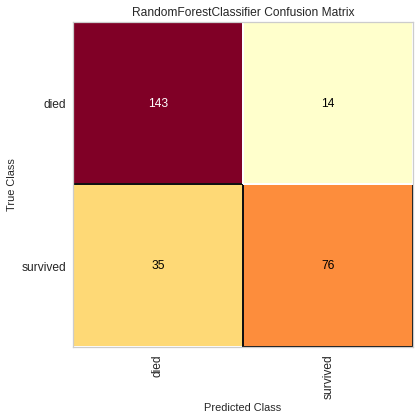

In [219]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)

mapping = {0: "died", 1:"survived"}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(rf,classes=["died","survived"],label_encoder = mapping)
cm_viz.score(X_test,y_test)
cm_viz.poof()

fig

In [220]:
roc_auc_score(y_test,y_pred) # ROC кривая, площадь

0.7977563550811959

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


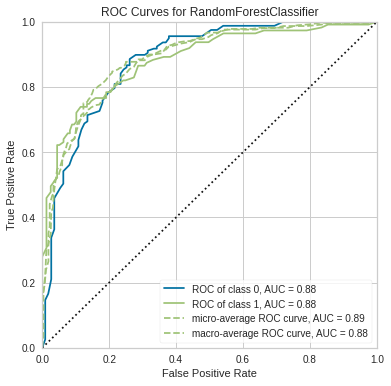

In [221]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(rf)
roc_viz.fit(X_train,y_train)
roc_viz.score(X_test,y_test)
roc_viz.poof()
fig

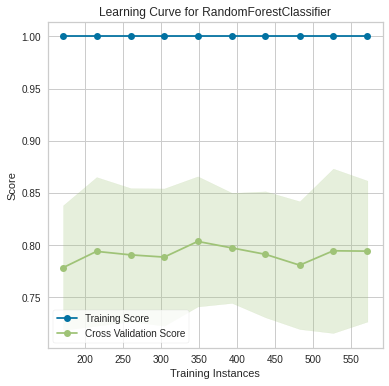

In [223]:
fig, ax = plt.subplots(figsize=(6,6))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3,1.0,10)
lc_viz = LearningCurve(rf,cv=cv,train_sizes=sizes,scoring="f1_weighted",h_jobs=4,ax=ax)
lc_viz.fit(X_train,y_train)
lc_viz.poof()
fig